In [ ]:
# Uploader le fichier JSON depuis ton PC
from google.colab import files
uploaded = files.upload()


Saving movies .json to movies .json


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving entertainment.films.json to entertainment.films.json


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_json("entertainment.films.json")


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving entertainment.films.json to entertainment.films (1).json


In [ ]:
df.head()


,Runtime (Minutes),Revenue (Millions)
0,151,132.37
1,120,7.22
2,111,60.31
3,116,100.01
4,133,532.17


In [ ]:
df = df.rename(columns={"Runtime (Minutes)": "runtime", "Revenue (Millions)": "revenue"})
df = df[["runtime", "revenue"]].dropna()


Corrélation de Pearson : 0.306


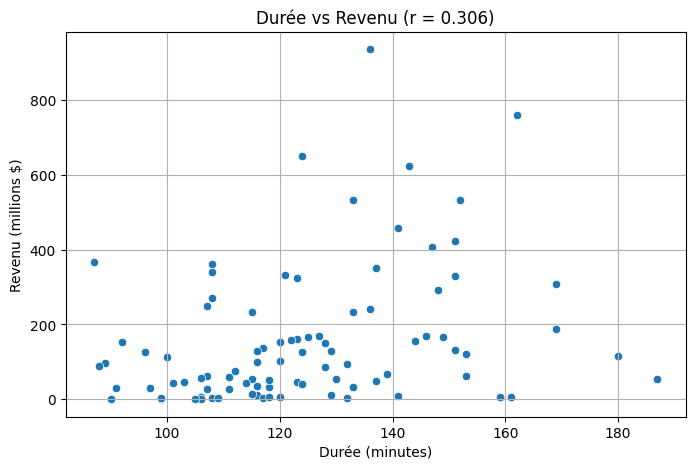

In [ ]:
# Calcul de la corrélation de Pearson
correlation = df["runtime"].corr(df["revenue"])
print(f"Corrélation de Pearson : {correlation:.3f}")

# Création du graphique de dispersion
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="runtime", y="revenue")
plt.title(f"Durée vs Revenu (r = {correlation:.3f})")
plt.xlabel("Durée (minutes)")
plt.ylabel("Revenu (millions $)")
plt.grid(True)
plt.show()


In [ ]:
import json
import csv

# Charger le fichier JSON
with open("entertainment.films.json", "r", encoding="utf-8") as file:
    data = json.load(file)

# Créer un set pour stocker les noms des acteurs sans doublon
actors_set = set()

# Parcourir tous les films
for film in data:
    cast = film.get("Cast")
    if cast:
        # Si "Cast" est une string avec des virgules
        if isinstance(cast, str):
            actors = [a.strip() for a in cast.split(",")]
            actors_set.update(actors)
        # Si "Cast" est déjà une liste
        elif isinstance(cast, list):
            actors_set.update(cast)

# Sauvegarder dans un fichier CSV
with open("actors.csv", "w", newline='', encoding="utf-8") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["name"])  # En-tête
    for actor in sorted(actors_set):
        writer.writerow([actor])

print("✅ Fichier actors.csv généré avec succès !")


FileNotFoundError: [Errno 2] No such file or directory: 'entertainment.films.json'

In [ ]:
from google.colab import files

# Permet d'importer un fichier local (choisis ton fichier .json depuis ton PC)
uploaded = files.upload()


Saving movies.json to movies.json


In [ ]:
import json

# Lecture ligne par ligne si plusieurs objets JSON
with open("movies .json", "r", encoding="utf-8") as file:
    data = [json.loads(line) for line in file]

# Vérifier les 2 premiers films
for film in data[:2]:
    print(film)



{'_id': '100', '_rev': '1-5993984b95d0851d9cb12590ec576a7f', 'title': 'The Departed', 'genre': 'Crime,Drama,Thriller', 'Description': 'An undercover cop and a mole in the police attempt to _identify each other while infiltrating an Irish gang in South Boston.', 'Director': 'Martin Scorsese', 'Actors': 'Leonardo DiCaprio, Matt Damon, Jack Nicholson, Mark Wahlberg', 'year': 2006, 'Runtime (Minutes)': 151, 'rating': 'G', 'Votes': 937414, 'Revenue (Millions)': 132.37, 'Metascore': 85}
{'_id': '21', '_rev': '1-f9df16eb7f3045ec7b1bd626e018b3c8', 'title': 'Gold', 'genre': 'Adventure,Drama,Thriller', 'Description': 'Kenny Wells, a prospector desperate for a lucky break, teams up with a similarly eager geologist and sets off on a journey to find gold in the uncharted jungle of Indonesia.', 'Director': 'Stephen Gaghan', 'Actors': 'Matthew McConaughey, Edgar Ramírez, Bryce Dallas Howard, Corey Stoll', 'year': 2016, 'Runtime (Minutes)': 120, 'rating': 'unrated', 'Votes': 19053, 'Revenue (Millions)

In [ ]:
import csv

# Extraire tous les acteurs
actor_set = set()  # pour éviter les doublons

for film in data:
    # Vérifie que le champ Actors existe
    if "Actors" in film:
        actors = film["Actors"].split(",")
        for actor in actors:
            actor_set.add(actor.strip())  # enlever les espaces

# Créer actors.csv
with open("actors.csv", "w", newline='', encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(["name"])  # en-tête
    for actor in sorted(actor_set):  # trié pour lisibilité
        writer.writerow([actor])

print(f"{len(actor_set)} acteurs uniques enregistrés dans actors.csv")


320 acteurs uniques enregistrés dans actors.csv


In [ ]:
from google.colab import files
files.download("actors.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import json
import csv

# Lire ligne par ligne (NDJSON)
with open("movies.json", "r", encoding="utf-8") as file:
    data = [json.loads(line) for line in file]

# Extraire les paires (actor, film)
acted_in = []

for film in data:
    title = film.get("title")
    actors = film.get("Actors")

    if title and actors:
        for actor in actors.split(","):
            actor_clean = actor.strip()
            if actor_clean:
                acted_in.append((actor_clean, title))

# Écriture du fichier CSV
with open("acted_in.csv", "w", newline='', encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(["actor", "film"])
    writer.writerows(acted_in)

print(f"✅ Fichier acted_in.csv créé avec {len(acted_in)} relations.")



✅ Fichier acted_in.csv créé avec 400 relations.


In [ ]:
from google.colab import files
files.download("acted_in.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
import csv

# Membres du groupe et film choisi (doit exister dans la base)
relations_projet = [
    ("Hamza", "The Departed"),
    ("karim", "The Departed"),
    ("Baha", "The Departed")
]

# Création du fichier CSV
with open("acted_in_projet.csv", "w", newline='', encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(["actor", "film"])  # en-têtes
    writer.writerows(relations_projet)

print("✅ Fichier acted_in_projet.csv créé avec succès.")


✅ Fichier acted_in_projet.csv créé avec succès.


In [2]:
from google.colab import files
files.download("acted_in_projet.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
from google.colab import files
uploaded = files.upload()  # te permet d'importer manuellement films.csv


Saving films.csv to films.csv


In [5]:
import pandas as pd

# Charger le fichier films.csv
df_films = pd.read_csv("films.csv")

# Extraire les réalisateurs uniques
directors = df_films["director"].dropna().unique()

# Sauvegarder dans un nouveau fichier CSV
df_directors = pd.DataFrame({"name": directors})
df_directors.to_csv("directors.csv", index=False)

print("✅ Fichier directors.csv créé avec succès.")


✅ Fichier directors.csv créé avec succès.


In [6]:
from google.colab import files
files.download("directors.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>